In [1]:
import numpy as np
# numpy alised as np
import pandas as pd 
# Pandas alised as pd
import matplotlib.pyplot as plt
# matplotlib.pyplot alised as plt
import seaborn as sns
# seaborn alised as sns

#### Read the Dataset

In [3]:
df=pd.read_csv('CAR DETAILS  - CAR DETAILS .csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,name,Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 9)

### Data Preprocessing

#### 1) Check the columns name

In [5]:
df.columns

Index(['name', 'Brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

#### 2) Check the information about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   Brand          4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


 #### Check the Duplicate Values

In [7]:
df.duplicated().sum()                           

763

 #### Drop the Duplicate values

In [8]:
df.drop_duplicates(inplace=True)                

#### Check shape

In [9]:
df.shape                                     

(3577, 9)

#### Drop the first column   

In [10]:
df.drop(['name'],inplace=True,axis=1)  

In [11]:
df.columns

Index(['Brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### EDA

#### Depict count of top 7 Brand on countplot

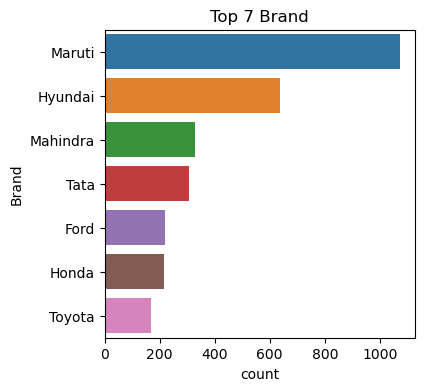

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(y=df['Brand'],order=df['Brand'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Brand')
plt.show()

#### Inference
1)The most car used is Maruti

#### Depict count of top 4 fuel car on countplot

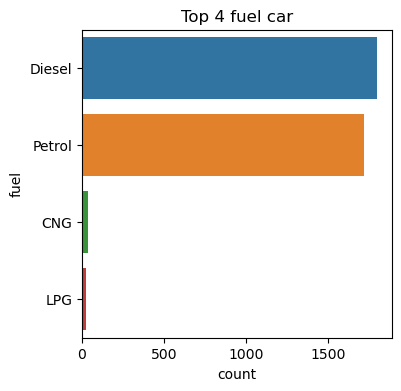

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(y=df['fuel'],order=df['fuel'].value_counts().sort_values(ascending=False)[:4].index)
plt.title('Top 4 fuel car')
plt.show()

#### Inference
1)The most fuel used is Petrol

#### Boxplot of  brand name with selling price

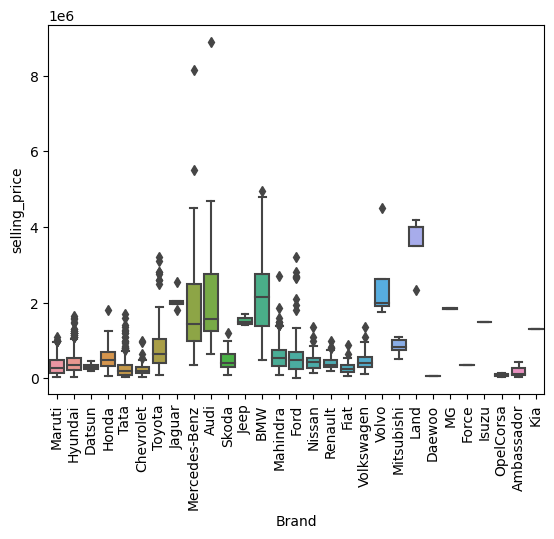

In [14]:
sns.boxplot(x=df['Brand'],y=df['selling_price'])
plt.xticks(rotation=90)
plt.show()

#### Corelation

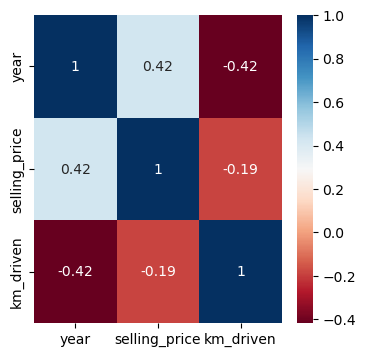

In [15]:
plt.figure(figsize=(4,4))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

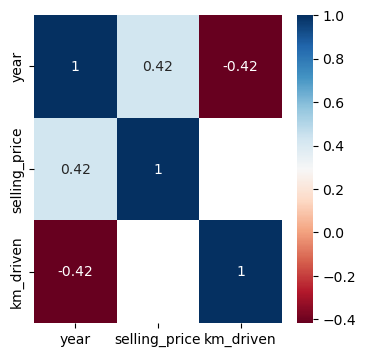

In [16]:
plt.figure(figsize=(4,4))
corr=df.corr()
sns.heatmap(corr[abs(corr)>0.4],annot=True,cmap='RdBu')
plt.show()

#### Distribution of plots of selling price

c:\Users\BIKASH SOREN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


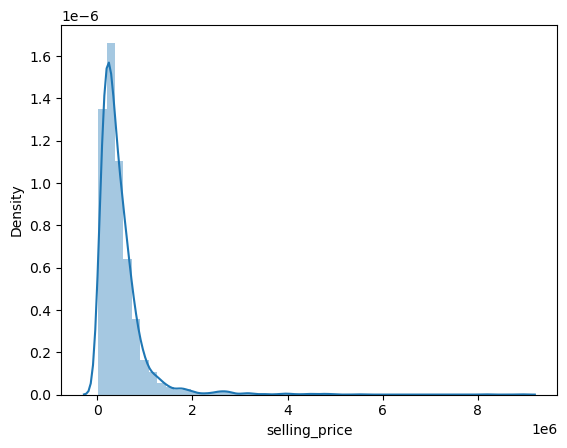

In [17]:
sns.distplot(df['selling_price'])
plt.show()

In [18]:
r4=df['year'].value_counts().sort_values(ascending=False)[:7]
r4

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
Name: year, dtype: int64

In [19]:
r4.index

Int64Index([2017, 2012, 2015, 2014, 2013, 2018, 2016], dtype='int64')

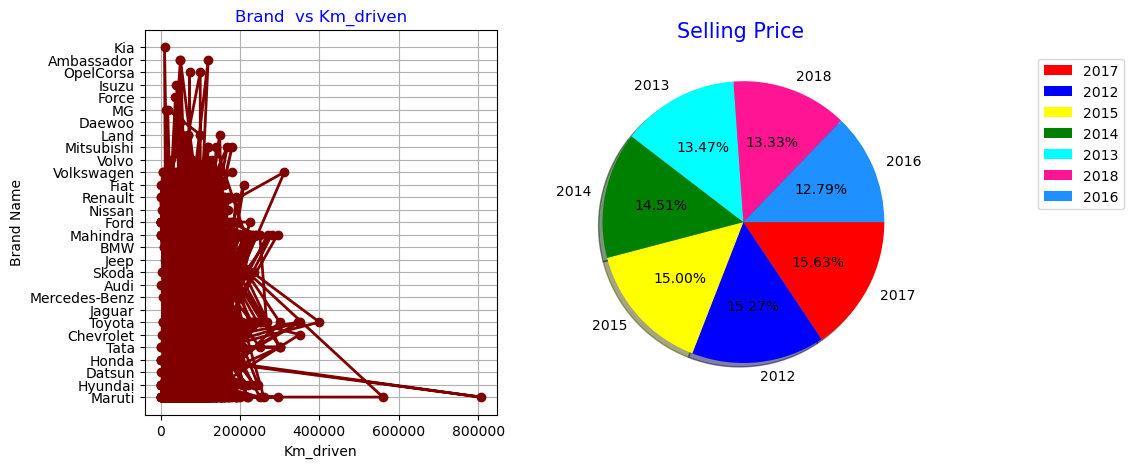

In [20]:
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(10,5))


ax2.plot(df['km_driven'],df['Brand'],color='maroon',lw=2,marker='o')
ax2.set_title('Brand  vs Km_driven',color='blue')
ax2.set_xlabel('Km_driven')
ax2.set_ylabel('Brand Name')
ax2.grid()

ax3.pie(x=r4.values,labels=r4.index,
       colors=['red','blue','yellow','green','cyan','deeppink','dodgerblue','orange','orange','purple','maroon'],
       autopct='%.2f%%',shadow=True,counterclock=False)
ax3.set_title('Selling Price ',color='blue',fontsize=15)
ax3.legend(loc='right',bbox_to_anchor=(1,1,0.6,-0.5))

plt.show()

#### Compute x(independent features) and y(dependent features)

In [21]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3577, 7)
(3577,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Split data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=19)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(2325, 7)
(2325,)
(1252, 7)
(1252,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Create function to compute MSE,MAE,Triel and test score

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
def reg_eval_matrics(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('Rmse',rmse)
    print('R2 score',r2)
       
def mscore(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    

#### Compute confusion_matrics, classifiation_report,accuracy_score

In [26]:
#from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [27]:
#def eval_mat(ytest,ypred):
    #cm=confusion_matrix(ytest,ypred)
    #print('confusion_matrix\n',cm)
    #print('classification_report\n',classification_report(ytest,ypred))
    #print('accuracy_report\n',accuracy_score(ytest,ypred))

#### Import ML model libraries

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
x_train.dtypes

Brand           object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

#### 1)  LinearRegression

In [31]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2=LinearRegression()

pipe_lr=Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr=pipe_lr.predict(x_test)

reg_eval_matrics(y_test,ypred_lr)

mscore(pipe_lr)

MAE 182501.09508388652
MSE 153920102381.64465
Rmse 392326.5252078231
R2 score 0.5626342614803637
Training Score 0.6921183118717729
Testing Score 0.5626342614803637


#### Ridge Regression

In [32]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2=Ridge(alpha=2.41)

pipe_rid=Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid=pipe_rid.predict(x_test)

reg_eval_matrics(y_test,ypred_rid)

mscore(pipe_rid)

MAE 184605.7248609268
MSE 155738579024.2833
Rmse 394637.2752595518
R2 score 0.5574670392171124
Training Score 0.6739810215808653
Testing Score 0.5574670392171124


 #### Lasso regression

In [33]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2=Lasso(alpha=0.2)

pipe_la=Pipeline([('step1',step1),('step2',step2)])

pipe_la.fit(x_train,y_train)

ypred_la=pipe_la.predict(x_test)

reg_eval_matrics(y_test,ypred_la)

mscore(pipe_la)

MAE 182503.5511205481
MSE 153918137887.78738
Rmse 392324.0215533423
R2 score 0.5626398436122191
Training Score 0.6921177580874095
Testing Score 0.5626398436122191


c:\Users\BIKASH SOREN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e+13, tolerance: 4.849e+10
  model = cd_fast.enet_coordinate_descent(


#### 2) Random Forest Classifire Model

In [34]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2= RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=11,min_samples_split=7)

pipe_rd=Pipeline([('step1',step1),('step2',step2)])

pipe_rd.fit(x_train,y_train)

ypred_rd=pipe_rd.predict(x_test)

reg_eval_matrics(y_test,ypred_rd)

mscore(pipe_rd)


MAE 173361.02476038339
MSE 144123706702.91614
Rmse 379636.28212134325
R2 score 0.5904708323022436
Training Score 0.5225806451612903
Testing Score 0.052715654952076675


#### 3)Decision Tree Classifier model

In [35]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2= DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=8)

pipe_dt=Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt=pipe_dt.predict(x_test)

reg_eval_matrics(y_test,ypred_dt)

mscore(pipe_dt)


MAE 229553.50958466454
MSE 310226242448.91534
Rmse 556979.5709439578
R2 score 0.11848856947601627
Training Score 0.06666666666666667
Testing Score 0.04313099041533546


#### AdaBoost Classifier

In [36]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,3,4,5,6])],remainder='passthrough')
step2= AdaBoostClassifier()

pipe_ad=Pipeline([('step1',step1),('step2',step2)])

pipe_ad.fit(x_train,y_train)

ypred_ad=pipe_ad.predict(x_test)

reg_eval_matrics(y_test,ypred_ad)

mscore(pipe_ad)

MAE 286650.9520766773
MSE 391449032321.1198
Rmse 625658.8785601303
R2 score -0.11230692069978998
Training Score 0.04688172043010753
Testing Score 0.03913738019169329


#### Save and Load the  Model

In [37]:
import pickle

In [38]:
pickle.dump(pipe_lr,open('lr_model.pkl','wb'))
pickle.dump(df,open('data1.pkl','wb'))

In [39]:
df.head(20)

,Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner


In [40]:
df['fuel'].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [41]:
df.dtypes


Brand            object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object